# **Project Name**    -  Health Insurance Cross Sell Prediction



##### Project Type    - Classification
##### Contribution    - Individual

# **Project Summary -**

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium There are multiple factors that play a major role in capturing customers for any insurance policy. Here we have information about demographics such as age, gender, region code, and vehicle damage, vehicle age, annual premium, policy sourcing channel. Based on the previous trend, this data analysis and prediction with machine learning models can help us understand what are the reasons for news popularity on social media and obtain the best classification model. We have a dataset which contains information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc. related to a person who is interested in vehicle insurance. Predicting whether a customer would be interested in buying Vehicle Insurance so that the company can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

# **GitHub Link -**

https://github.com/ad353/Health_Insurance_Cross_Sell_Prediction/blob/main/Health_Insurance_Cross_Sell_Prediction.ipynb

# **Problem Statement**


Our client is an Insurance company that has provided Health Insurance to its customers now they need our help in building a model to predict whether the policyholders (customers) will also be interested in Vehicle Insurance provided by the company.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from scipy.stats import randint as sp_randint

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install imblearn

### Dataset Loading

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df=pd.read_csv("/content/drive/MyDrive/Project/Classification/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv",encoding="latin-1")

### Dataset First View

In [5]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Dataset Rows & Columns count

In [6]:
print("Total no. of rows ",df.shape[0])
print("Total no. of columns ",df.shape[1])

Total no. of rows  381109
Total no. of columns  12


### Dataset Information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [8]:
print("There are {} duplicates present.".format(df.duplicated().sum()))

There are 0 duplicates present.


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

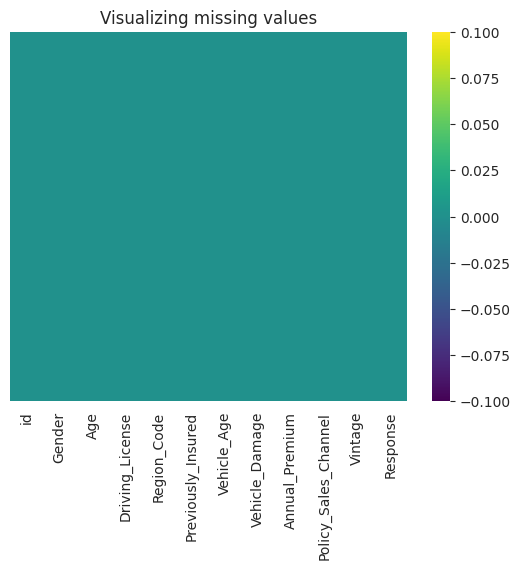

In [10]:
# Visualizing the missing values
sns.heatmap(df.isnull(),cmap="viridis",yticklabels=False)
plt.title("Visualizing missing values",fontsize=12)
plt.show()

### What did you know about your dataset?

- Our dataset contains 381109 rows and 12 columns
- We do not have null values in dataset

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Variables Description

- **id** - Unique ID for Customer
- **Gender** - Gender of Customer
- **Age** - Age of Customer
- **Driving_License** - 1: Customer has DL, 0 : Customer does not have DL
- **Region_Code** - Unique code for the region of the customer
- **Previously_Insured** - 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
- **Vehicle_Age** - Age of the vehicle
- **Vehicle_Damage** - 1: Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.
- **Annual_Premium** - The amount customer needs to pay as premium
- **Policy_Sales_Channel** - Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
- **Vintage** - Number of Days, Customer has been associated with the company
- **Response** - 1 : Customer is interested 0 : Customer is not interested

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
df.nunique().sort_values(ascending=True)

Gender                       2
Driving_License              2
Previously_Insured           2
Vehicle_Damage               2
Response                     2
Vehicle_Age                  3
Region_Code                 53
Age                         66
Policy_Sales_Channel       155
Vintage                    290
Annual_Premium           48838
id                      381109
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Assingning numericals column of df to variable numerical_cols
numerical_cols = list(df.describe())
numerical_df = df[numerical_cols]
numerical_df.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,40454.0,26.0,217,1
1,2,76,1,3.0,0,33536.0,26.0,183,0
2,3,47,1,28.0,0,38294.0,26.0,27,1
3,4,21,1,11.0,1,28619.0,152.0,203,0
4,5,29,1,41.0,1,27496.0,152.0,39,0


In [15]:
# Assigning catagoricals column of df to variable catagorical_cols
categorical_cols=list(set(df.columns)-set(numerical_cols))
categorical_df=df[categorical_cols]
categorical_df.head()

,Vehicle_Damage,Gender,Vehicle_Age
0,Yes,Male,> 2 Years
1,No,Male,1-2 Year
2,Yes,Male,> 2 Years
3,No,Male,< 1 Year
4,No,Female,< 1 Year


### What all manipulations have you done and insights you found?

We have divided the dataframe into two dataframes, namely Numerical df and Categorical df.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

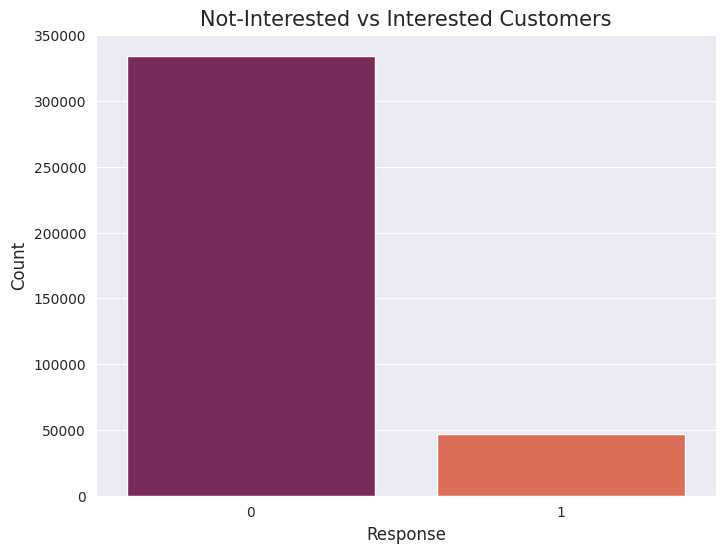

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(x='Response',data=df,palette="rocket")
plt.title("Not-Interested vs Interested Customers",fontsize=15)
plt.xlabel('Response',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

Countplots are effective at highlighting imbalances in data.

##### 2. What is/are the insight(s) found from the chart?

The data is highly imbalanced

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,the gained insights help creating a positive business impact

#### Chart - 2

Gender
Male      206089
Female    175020
Name: count, dtype: int64


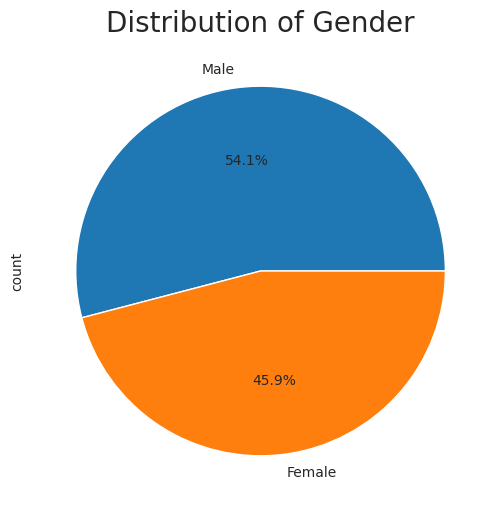

In [17]:
print(df['Gender'].value_counts())
df['Gender'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%")
plt.title('Distribution of Gender',fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are effective for displaying the distribution of categories as parts of a whole. In the case of gender distribution, it's easy to see the relative proportions of males and females within the dataset.

##### 2. What is/are the insight(s) found from the chart?

There are 206089 males i.e (54.1%)  and 175020 females i.e(45.9%). Males are little bit more in comparison to females

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the gender distribution of customer base can be valuable for targeted marketing efforts.

#### Chart - 3

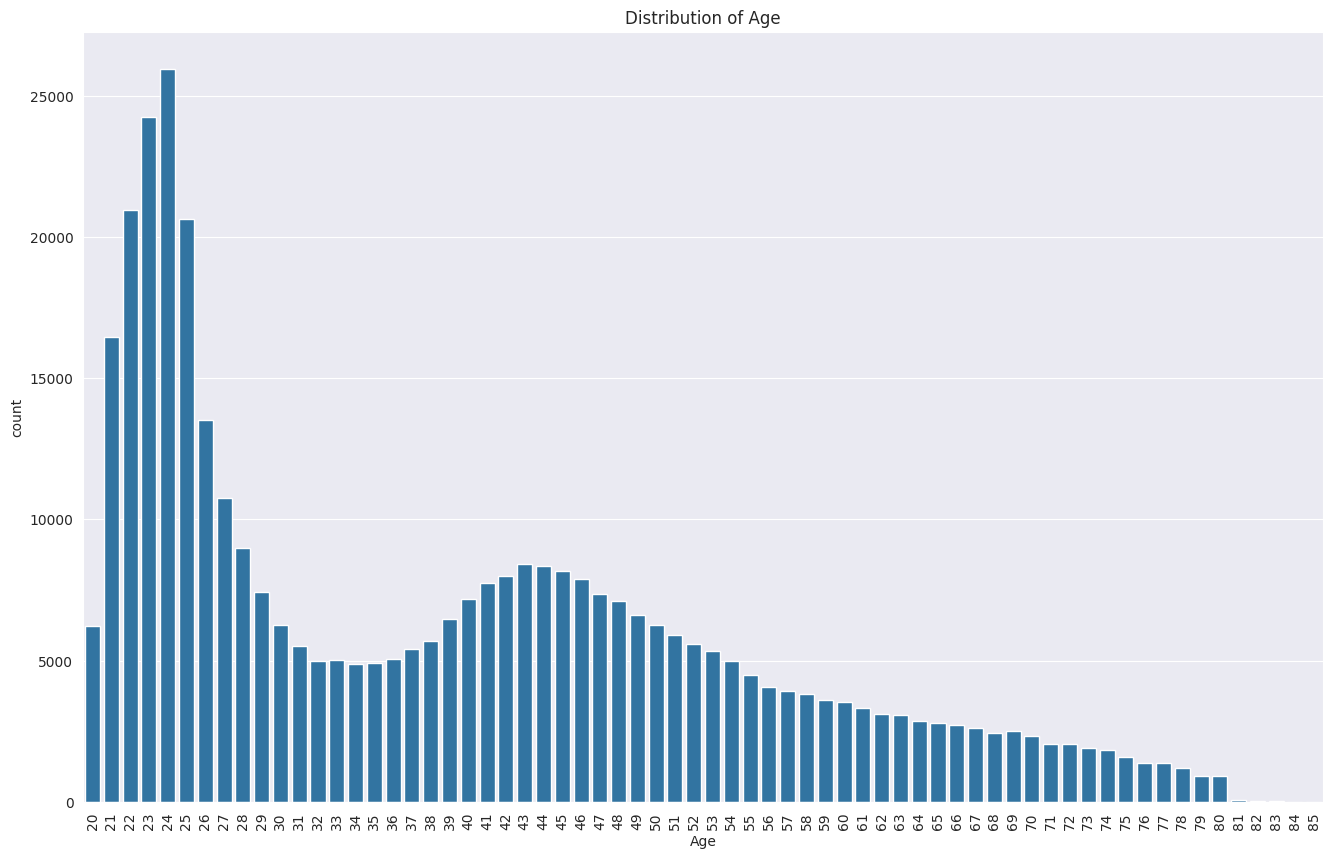

In [18]:
plt.figure(figsize=(16,10))
sns.countplot(x='Age',data=df)
plt.title("Distribution of Age")
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

To show distribution of Age

##### 2. What is/are the insight(s) found from the chart?

From the above distribution of age we can see that most of the customers age is between 21 to 25 years.There are few Customers above the age of 60 years

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the age distribution of customer base can be valuable for targeted marketing efforts. Different age groups may have varying preferences, needs, and behaviors, which can inform  marketing strategies.

#### Chart - 4

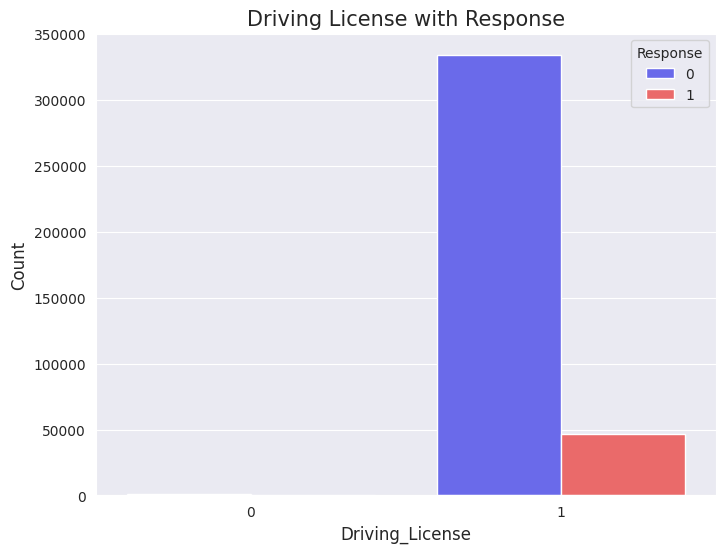

In [19]:
plt.figure(figsize=(8,6))
sns.countplot(x='Driving_License',hue="Response",data=df,palette="seismic")
plt.title("Driving License with Response",fontsize=15)
plt.xlabel('Driving_License',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

To show count of customers who have DL

##### 2. What is/are the insight(s) found from the chart?

As we can see from the graph,
Customers who are interested in Vehicle Insurance almost having driving license

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Yes, the gained insights help to create a positive impact on business because on the basis of above analysis we can target those peoples who are having driving license.

#### Chart - 5

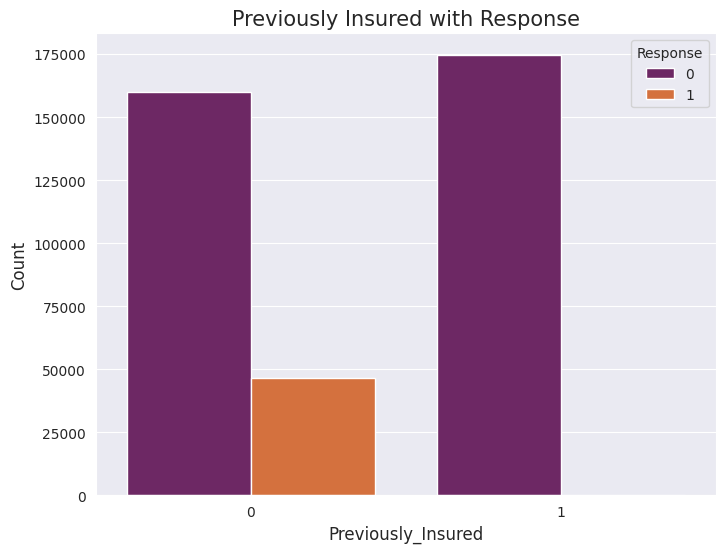

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(x='Previously_Insured',hue="Response",data=df,palette="inferno")
plt.title("Previously Insured with Response",fontsize=15)
plt.xlabel('Previously_Insured',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

To show count of Previously Insured customers

##### 2. What is/are the insight(s) found from the chart?

Customer who are not perviosly insured are likely to be inetrested

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can use this insight to design targeted marketing campaigns specifically aimed at individuals who don't have previous insurance coverage. Highlighting the benefits of insurance products to this group may result in increased interest and potential new customers.

#### Chart - 6

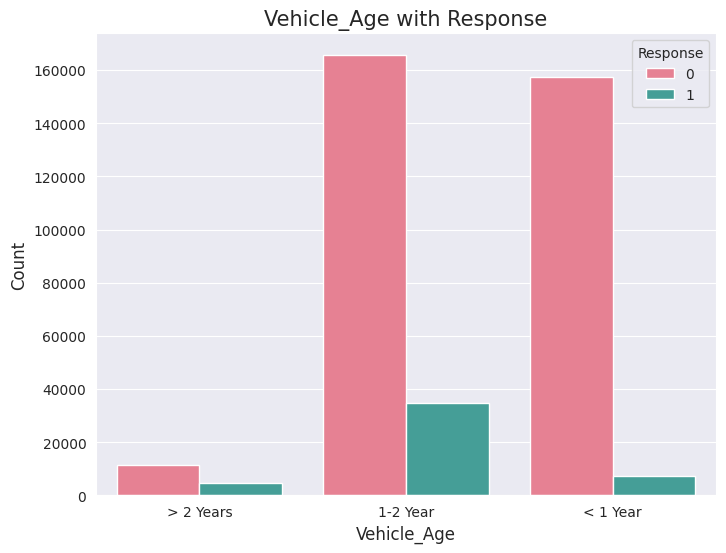

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(x='Vehicle_Age',hue="Response",data=df,palette="husl")
plt.title("Vehicle_Age with Response",fontsize=15)
plt.xlabel('Vehicle_Age',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

Countplots allow to visually compare the frequency of different categories.

##### 2. What is/are the insight(s) found from the chart?

Customers with vechicle age 1-2 years are more likely to interested as compared to the other two

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can use this insight to target marketing efforts specifically towards customers whose vehicles fall within the 1-2 year age range.

#### Chart - 7

Vehicle_Damage
Yes    192413
No     188696
Name: count, dtype: int64


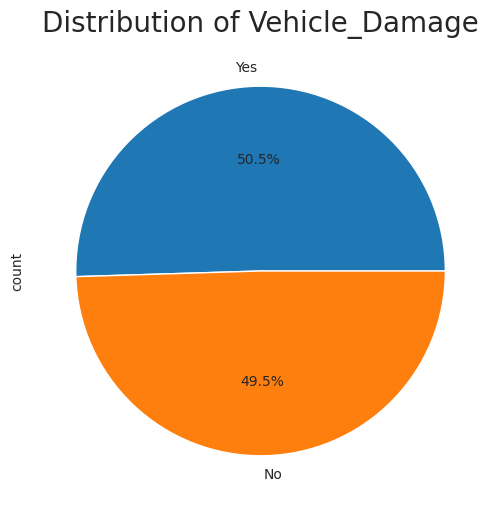

In [22]:
print(df['Vehicle_Damage'].value_counts())

df['Vehicle_Damage'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%")
plt.title('Distribution of Vehicle_Damage',fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts often include percentage labels, making it easy for viewers to see the exact percentage of each category. This can be helpful for precise communication of the distribution.

##### 2. What is/are the insight(s) found from the chart?

50.5% of the vehicles have past damage

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Knowing that a significant number of customers have experienced vehicle damage, we can design marketing campaigns that emphasize the benefits of insurance.

#### Chart - 8

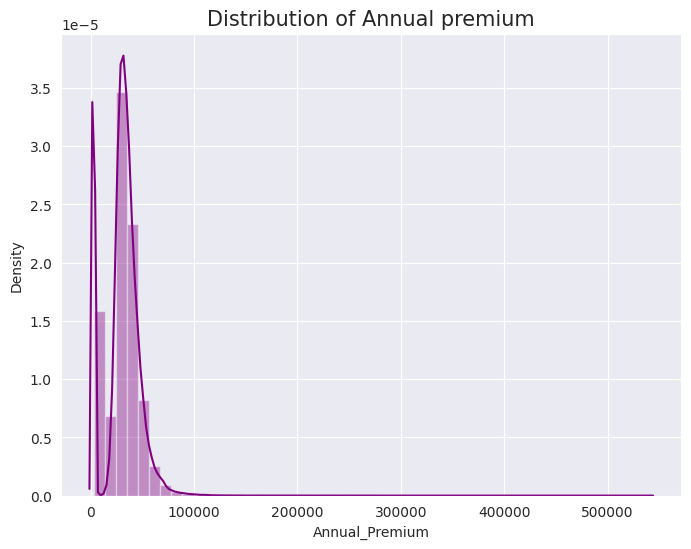

In [23]:
plt.figure(figsize=(8,6))
sns.distplot(df['Annual_Premium'],color="purple")
plt.title("Distribution of Annual premium",fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

Distplot helps in identifying the skewness of the data distribution.

##### 2. What is/are the insight(s) found from the chart?

From the distribution plot we can infer that the annual premium variable is right skewed

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that the annual premium variable is right-skewed can be a valuable tool for pricing, risk assessment,and marketing strategies in the insurance.

#### Chart - 9

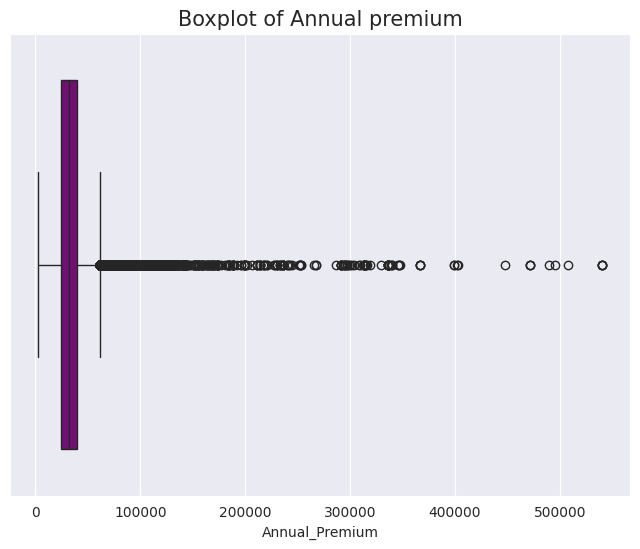

In [24]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Annual_Premium",data=df,color="Purple")
plt.title("Boxplot of Annual premium",fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

Boxplots make it easy to identify potential outliers in the data. Outliers are data points that fall significantly above or below the whiskers of the plot, helping to spot unusual or unexpected values.

##### 2. What is/are the insight(s) found from the chart?

From the boxplot we can observe lot of outliers in the variable

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding and identifying outliers can help in risk management.

#### Chart - 10

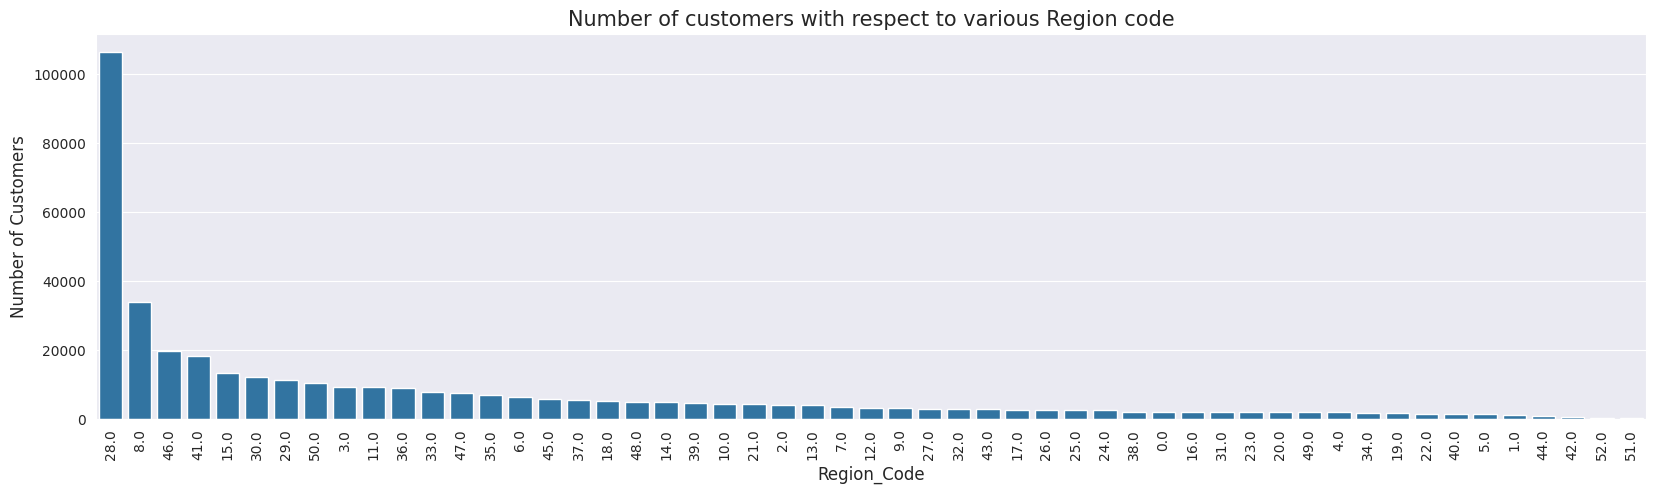

In [25]:
plt.figure(figsize=(20,5))
sns.countplot(x='Region_Code',data=df,order=df['Region_Code'].value_counts().index)
plt.title('Number of customers with respect to various Region code',fontsize=15)
plt.xticks(rotation=90)
plt.xlabel("Region_Code",fontsize=12)
plt.ylabel('Number of Customers',fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

To show Number of customers with respect to various Region code

##### 2. What is/are the insight(s) found from the chart?

We can see most of the people are from region 28

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that most customers are from a specific region can be a valuable tool for tailoring marketing and business strategies.

#### Chart - 11

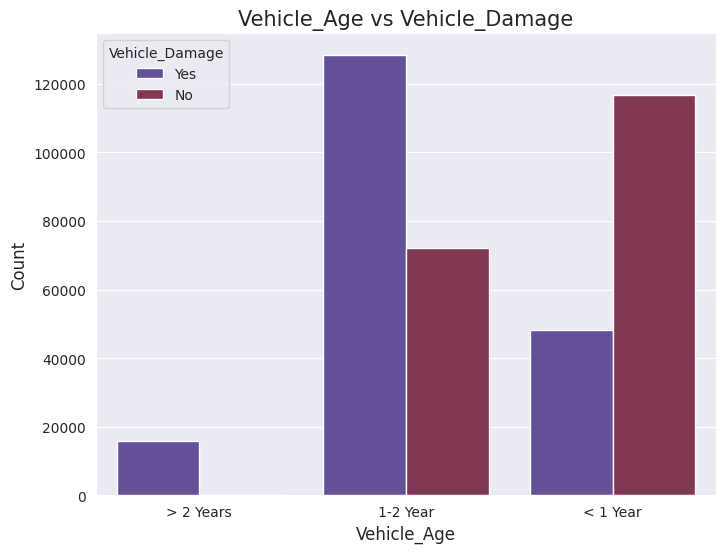

In [26]:
plt.figure(figsize=(8,6))
sns.countplot(x='Vehicle_Age',hue="Vehicle_Damage",data=df,palette="twilight")
plt.title("Vehicle_Age vs Vehicle_Damage",fontsize=15)
plt.xlabel('Vehicle_Age',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

Countplots allow to visually compare the frequency of different categories. This can be helpful for identifying imbalances, trends, or patterns in your data.

##### 2. What is/are the insight(s) found from the chart?

Vehicles in the age 1-2 year are more damaged compared to other two

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

To offer specialized insurance products or coverage options specifically for vehicles in the 1-2 year age range.

#### Chart - 12

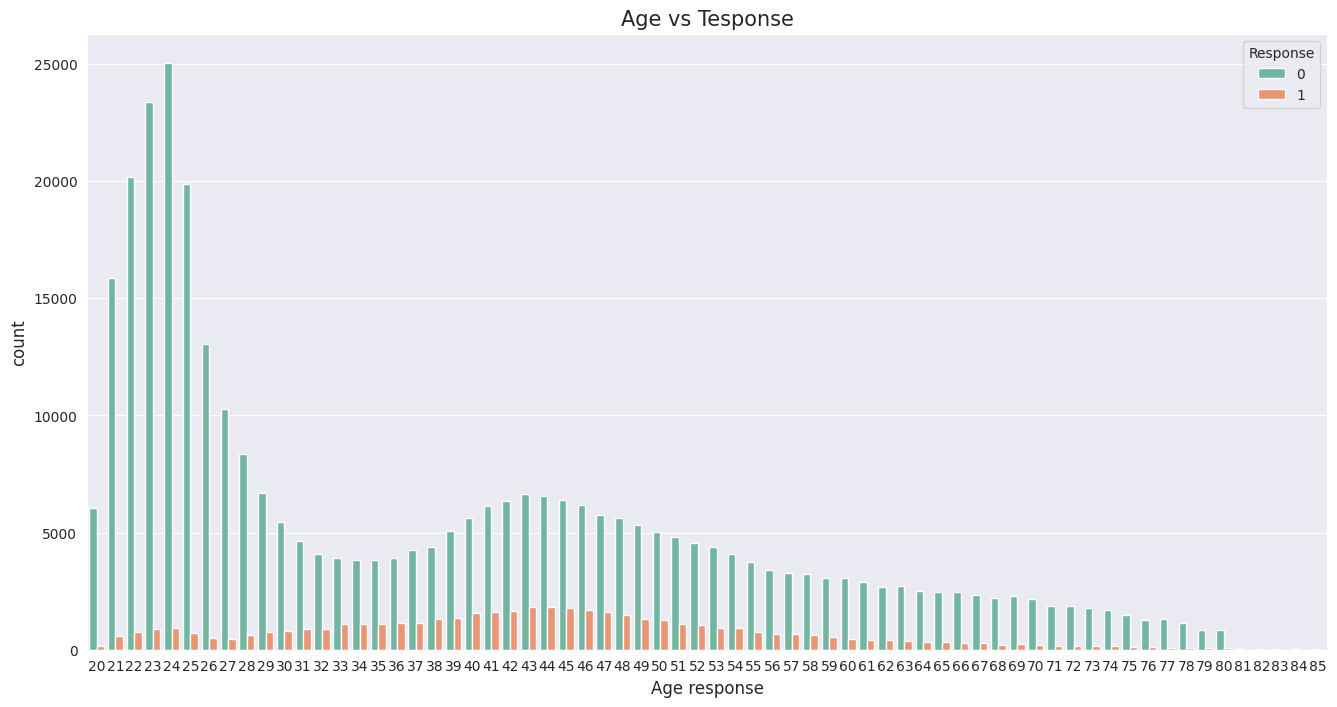

In [27]:
plt.figure(figsize=(16,8))
sns.countplot(data=df, x='Age',hue='Response', palette='Set2')
plt.xlabel('Age response',fontsize=12)
plt.ylabel('count',fontsize=12)
plt.title("Age vs Tesponse",fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

To show Distribution Age vs Response

##### 2. What is/are the insight(s) found from the chart?

People ages between from 31 to 50 are more likely to respond

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Knowing that this age group is more responsive, insurance providers can develop insurance products or policies that are better suited to their preferences and life stages.

#### Chart - 13

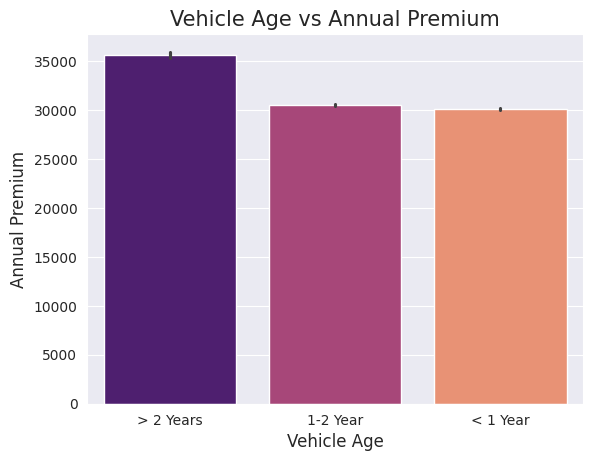

In [28]:
sns.barplot(x='Vehicle_Age',y='Annual_Premium',data=df,palette='magma')
plt.title("Vehicle Age vs Annual Premium",fontsize=15)
plt.xlabel("Vehicle Age",fontsize=12)
plt.ylabel("Annual Premium",fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

To show Vehicle Age vs Annual Premium

##### 2. What is/are the insight(s) found from the chart?

Customer paying higher premium if age of vehicle greater than 2 years

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the relationship between vehicle age and premiums allows insurers to better assess risk. It helps in underwriting policies and determining the level of coverage needed for different vehicle age groups, which can lead to more effective risk management.

#### Chart - 14

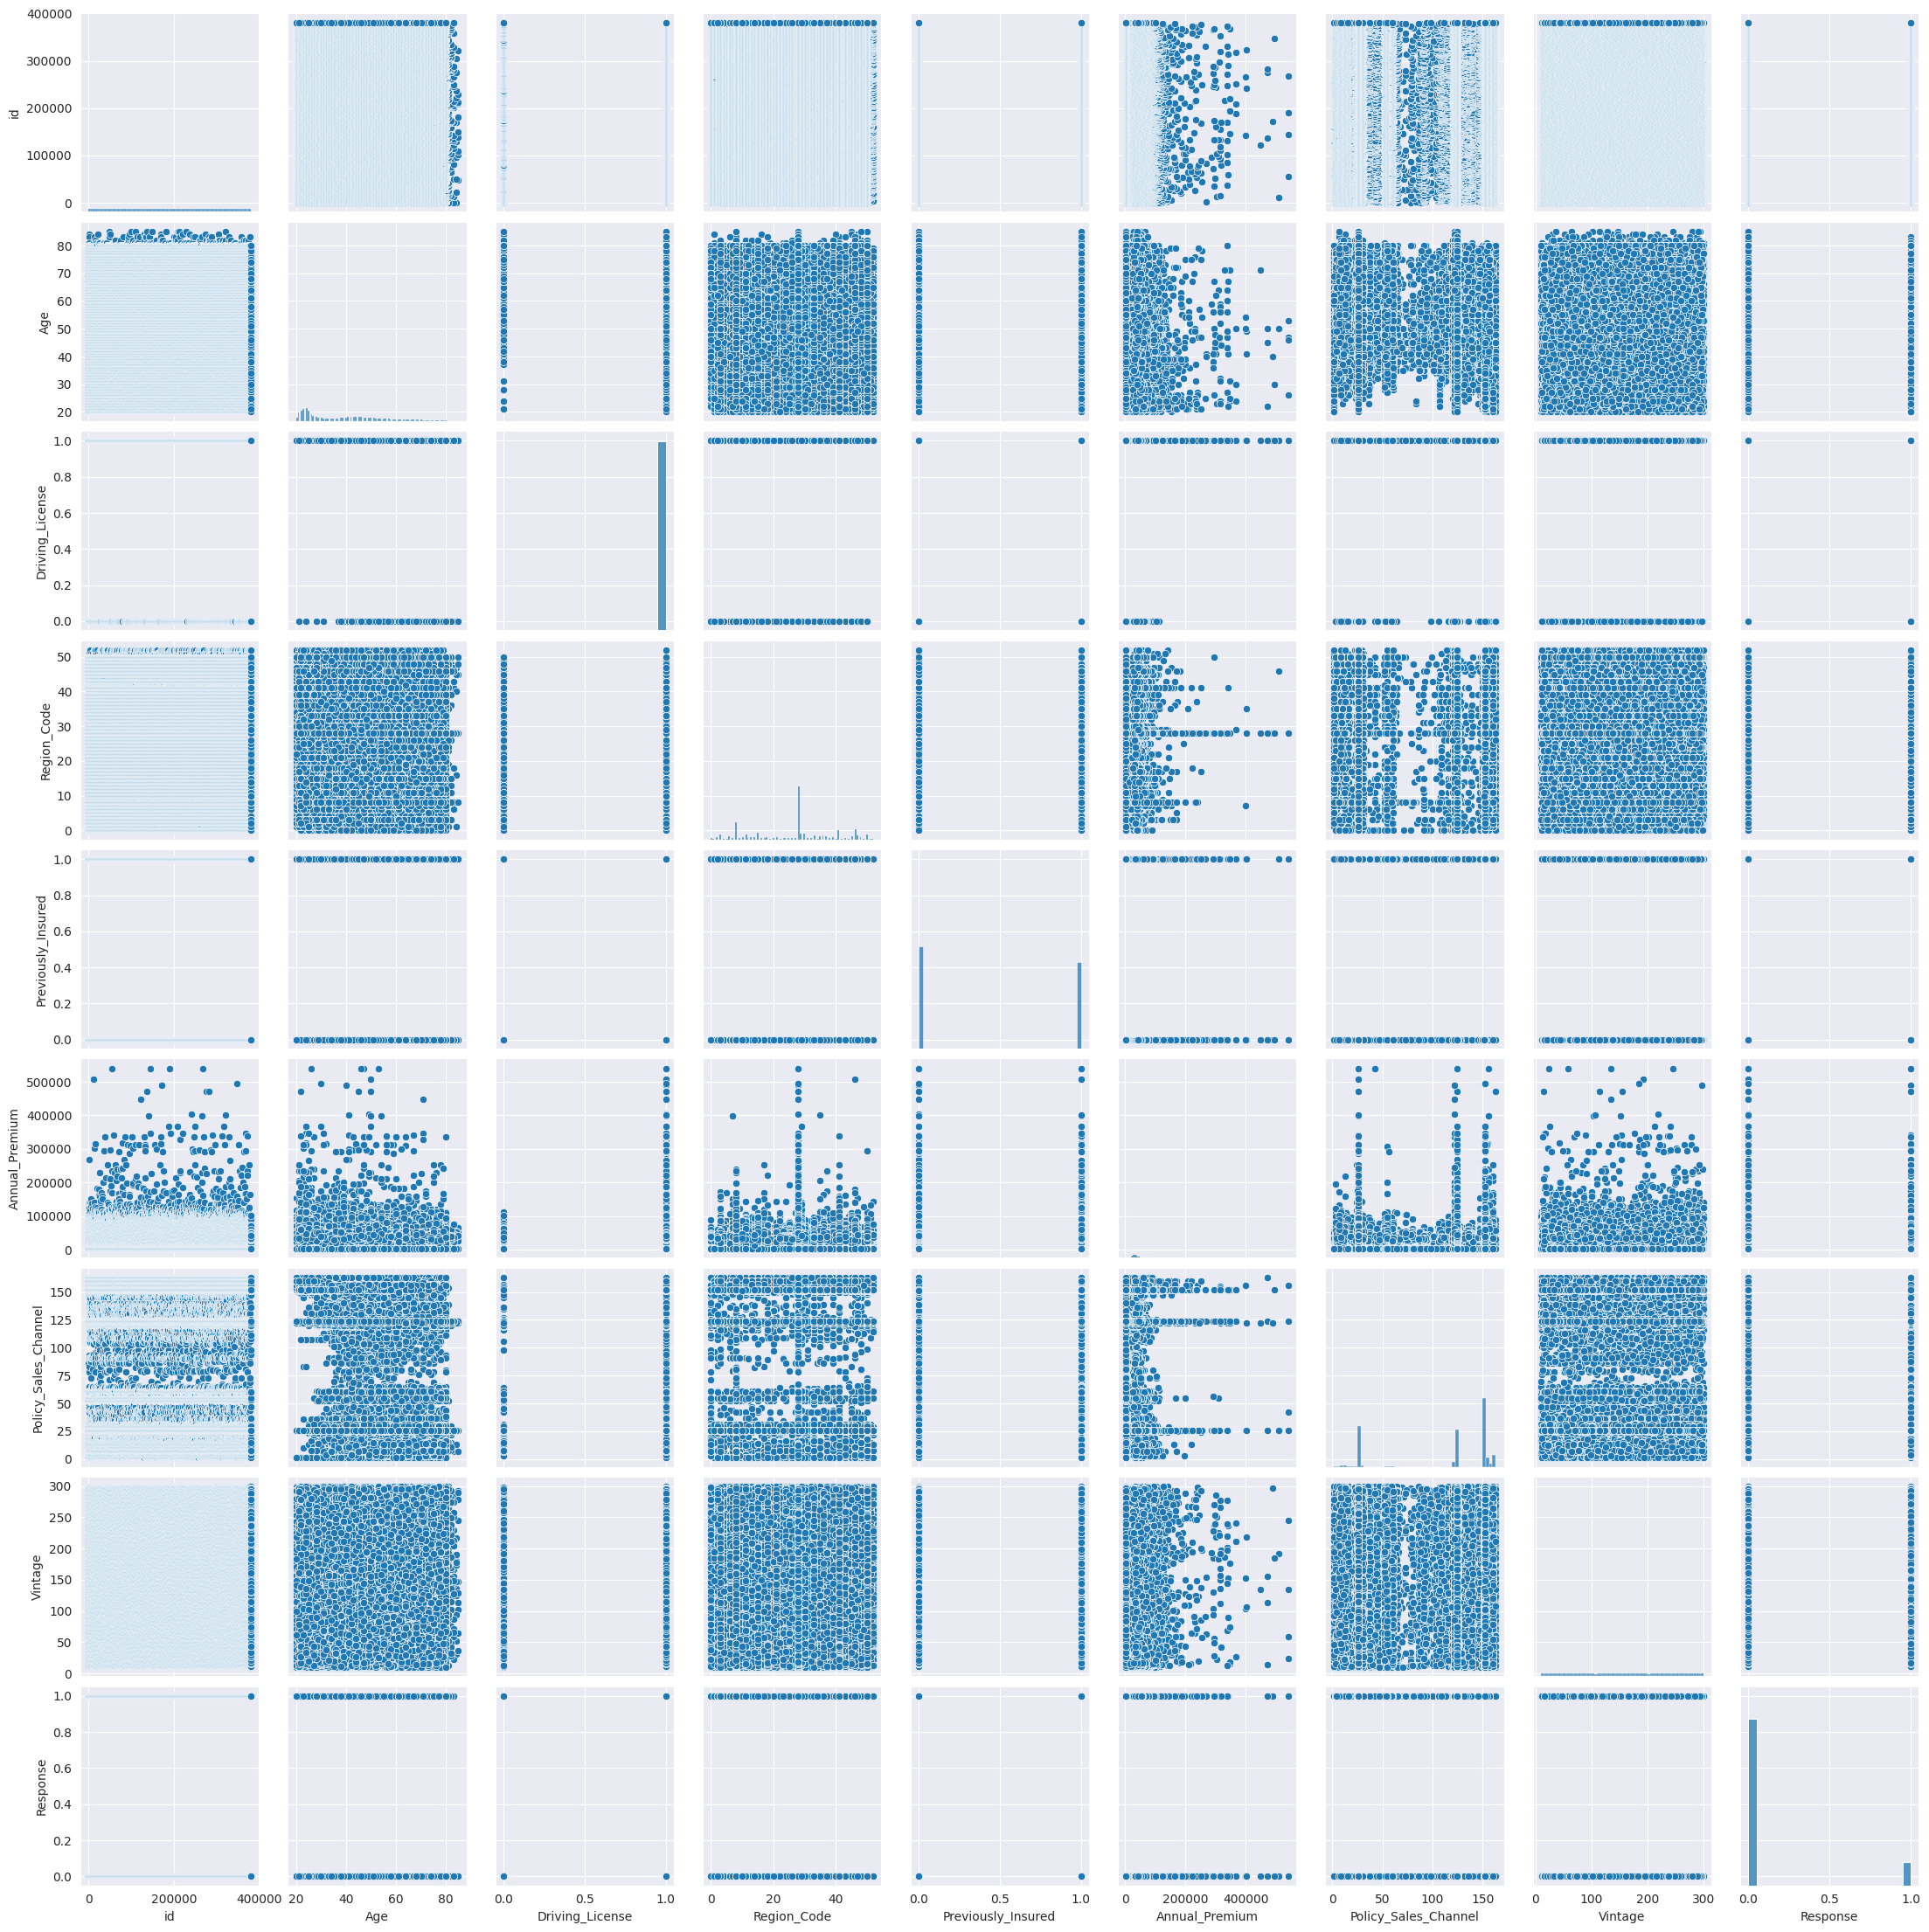

In [29]:
sns.pairplot(data=df)

##### 1. Why did you pick the specific chart?

A pairplot, also known as a scatterplot matrix, is a visualization that allows you to visualize the relationships between all pairs of variables in a dataset. It is a useful tool for data exploration because it allows you to quickly see how all of the variables in a dataset are related to one another.

Thus, we used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

The graph above shows how each feature is distributed in respect to other features. Since many features have binary values, we cannot see a good relationship with other features.

## ***5. Feature Engineering & Data Pre-processing***

In [30]:
# Creating a copy of the dataset for further feature engineering
df1=df.copy()

### 1. Handling Missing Values

In [31]:
df1.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values present

### 2. Handling Outliers

In [32]:
# Handling Outliers & Outlier treatments

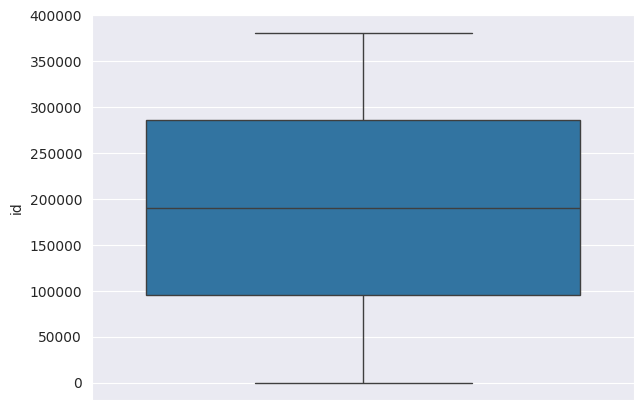

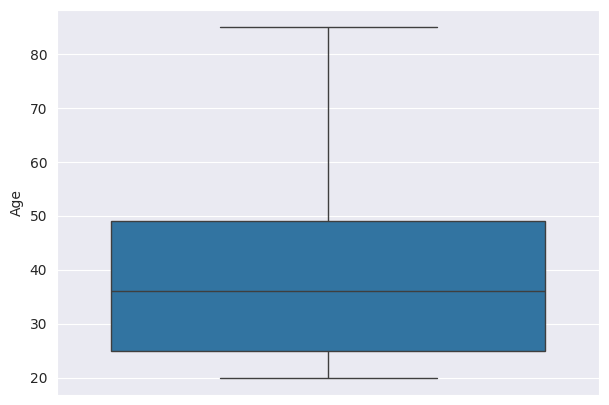

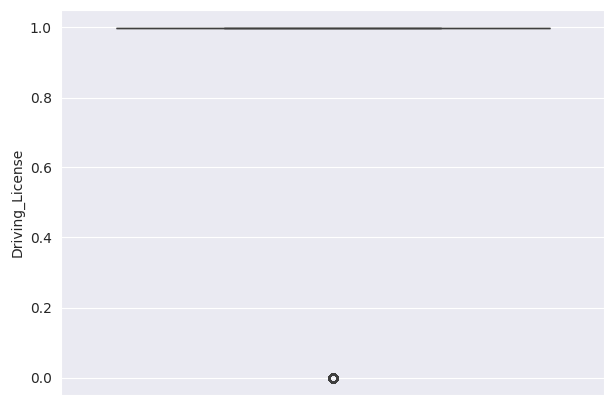

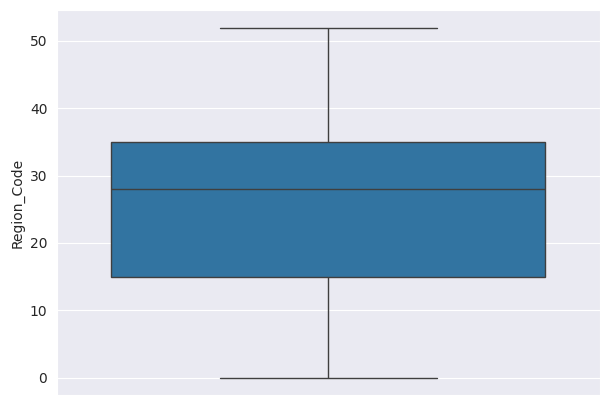

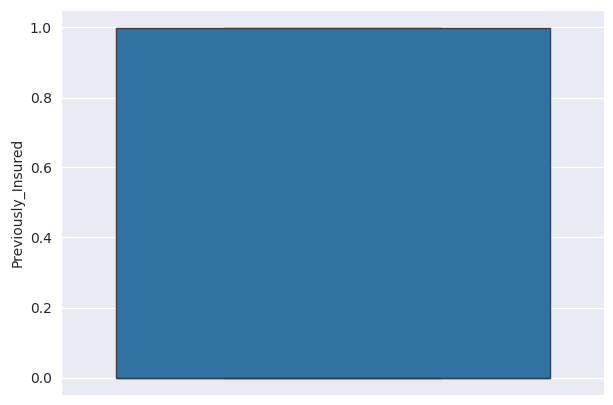

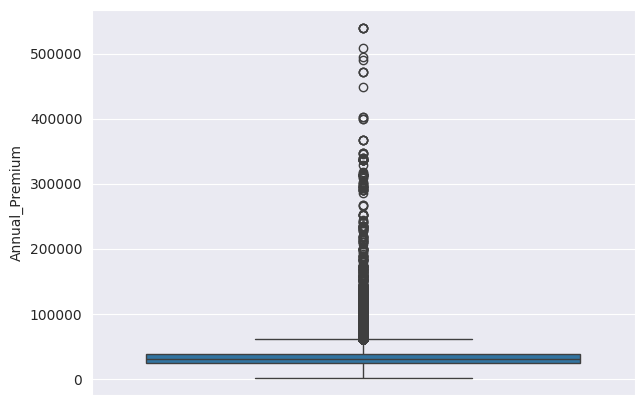

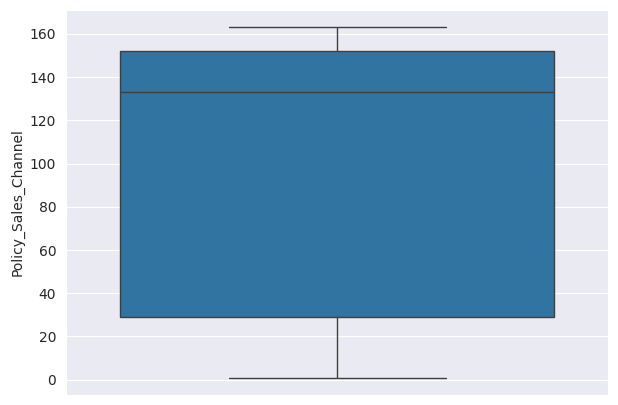

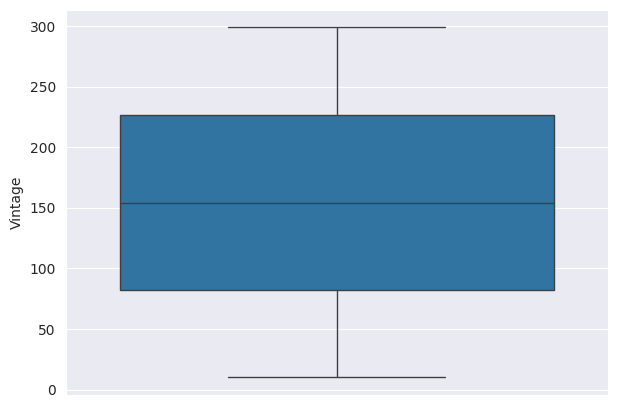

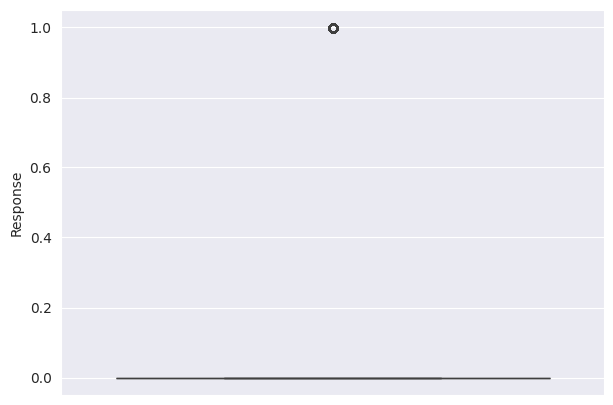

In [33]:
for column_name in numerical_cols:
    plt.figure(figsize=(7,5))
    sns.boxplot(df1[column_name])
    plt.show()

<Axes: xlabel='Annual_Premium', ylabel='Density'>

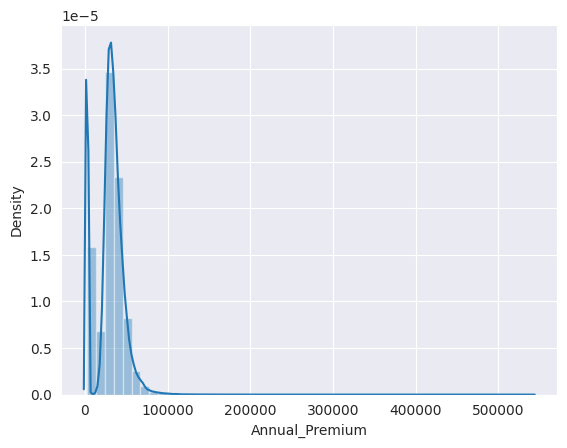

In [34]:
sns.distplot(df1['Annual_Premium'])

<Axes: xlabel='Annual_Premium'>

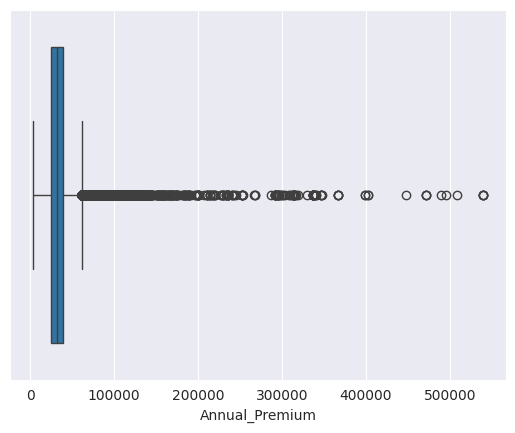

In [35]:
sns.boxplot(x='Annual_Premium',data=df1)

In [36]:
df1['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

In [37]:
percentile25=df1['Annual_Premium'].quantile(0.25)
percentile75=df1['Annual_Premium'].quantile(0.75)

In [38]:
print("25% is {} and 75% is {}".format(percentile25,percentile75))

25% is 24405.0 and 75% is 39400.0


In [39]:
iqr=percentile75-percentile25

In [40]:
iqr

14995.0

In [41]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

In [42]:
print("Upper limit ",upper_limit)
print("Lower limit ",lower_limit)

Upper limit  61892.5
Lower limit  1912.5


In [43]:
df1[df1['Annual_Premium']<lower_limit]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response


In [44]:
df1[df1['Annual_Premium'] > upper_limit]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
25,26,Female,21,1,28.0,1,< 1 Year,No,61964.0,152.0,72,0
37,38,Female,25,1,28.0,1,< 1 Year,No,76251.0,152.0,107,0
67,68,Male,60,1,28.0,0,1-2 Year,Yes,66338.0,124.0,73,0
139,140,Male,21,1,29.0,1,< 1 Year,No,62164.0,152.0,116,0
149,150,Female,22,1,11.0,1,< 1 Year,No,76651.0,152.0,258,0
...,...,...,...,...,...,...,...,...,...,...,...,...
380959,380960,Male,25,1,8.0,1,< 1 Year,No,61909.0,152.0,161,0
380998,380999,Female,33,1,8.0,0,1-2 Year,Yes,101664.0,124.0,21,0
381035,381036,Female,22,1,11.0,1,< 1 Year,No,62889.0,152.0,295,0
381047,381048,Female,52,1,8.0,1,1-2 Year,No,71915.0,7.0,233,0


In [45]:
# Trimming

df2=df1[df1["Annual_Premium"] < upper_limit]

In [46]:
df2.shape

(370789, 12)

<Axes: xlabel='Annual_Premium'>

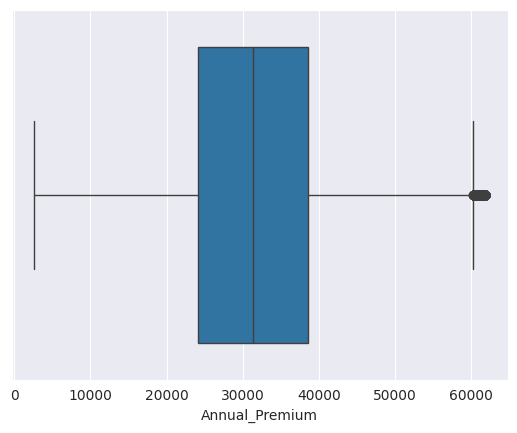

In [47]:
sns.boxplot(x="Annual_Premium",data=df2)

##### What all outlier treatment techniques have you used and why did you use those techniques?

The data is right-skewed. So to remove outliers we have used trimming

### 3. Categorical Encoding

In [48]:
# label Encoding
le=LabelEncoder()
df2['Vehicle_Damage']=le.fit_transform(df2['Vehicle_Damage'])

In [49]:
# One hot Enoding
df2=pd.get_dummies(df2,columns=['Gender','Vehicle_Age'],drop_first=True)

In [50]:
df2.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,44,1,28.0,0,1,40454.0,26.0,217,1,True,False,True
1,2,76,1,3.0,0,0,33536.0,26.0,183,0,True,False,False
2,3,47,1,28.0,0,1,38294.0,26.0,27,1,True,False,True
3,4,21,1,11.0,1,0,28619.0,152.0,203,0,True,True,False
4,5,29,1,41.0,1,0,27496.0,152.0,39,0,False,True,False


#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used Label Encoding for Vehicle_Damage column and One hot Encoding for Gender and Vehicle_Age column

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [51]:
# Manipulate Features to minimize feature correlation and create new features

# Contain all independent variables
X=df2.drop('Response',axis=1)

# Contain dependent variable
y=df2['Response']

#### 2. Feature Selection

[0.18883783 0.14436287 0.00045732 0.10132984 0.05236561 0.07316239
 0.15292681 0.0719303  0.18340178 0.00727435 0.02003541 0.00391551]


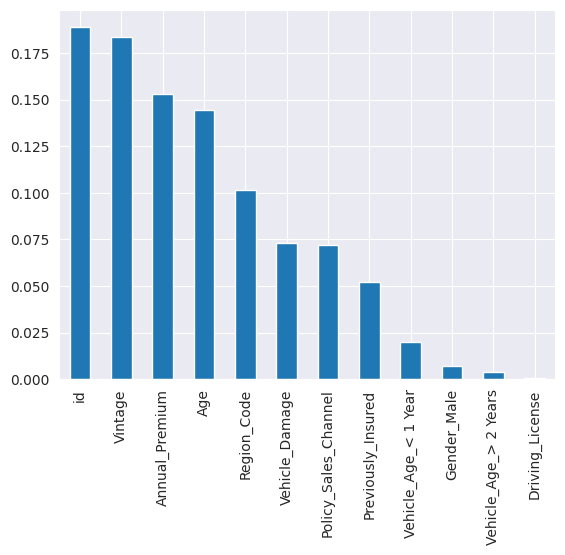

In [52]:
etc=ExtraTreesClassifier()
etc.fit(X,y)
print(etc.feature_importances_)
imp_features=pd.Series(etc.feature_importances_,index=X.columns)
imp_features.nlargest(12).plot(kind='bar')
plt.show()

In [53]:
# Dropping less important features
X=X.drop('Driving_License',axis=1)

##### What all feature selection methods have you used  and why?

I have used ExtraTreesClassifier to select important features from data

##### Which all features you found important and why?

'id', 'Age', 'Region_Code', 'Previously_Insured', 'Vehicle_Damage','Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Gender_Male','Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years'

I found these featues are important

### 3. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes,dataset is imbalanced

Original dataset shape Counter({0: 325634, 1: 45155})
Resampled dataset shape Counter({1: 325634, 0: 325634})


<Axes: xlabel='Response', ylabel='count'>

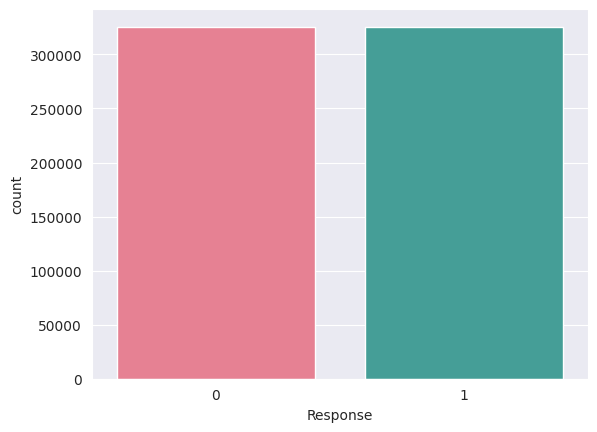

In [54]:
# Handling Imbalanced Dataset
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()
X_new,y_new=ros.fit_resample(X,y)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(x=y_new,palette='husl')

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

To handle class imbalance I have used over sampling technique

### 4. Data Splitting

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=42)

In [56]:
print('Shape of X_train',X_train.shape)
print('Shape of y_train',y_train.shape)
print('Shape of X_test',X_test.shape)
print('Shape of y_test',y_test.shape)

Shape of X_train (455887, 11)
Shape of y_train (455887,)
Shape of X_test (195381, 11)
Shape of y_test (195381,)


##### What data splitting ratio have you used and why?

I have used spliting ratio of 70-30 i.e 70% for training and 30% for testing

### 5. Data Scaling

In [57]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

##### Which method have you used to scale you data and why?

I have used Standardization for Data Scaling

Standardization is a preprocessing technique to scale numerical features to have a mean of 0 and a standard deviation of 1

## ***6. ML Model Implementation***

### ML Model - Logistic Regression

In [58]:
logistic_model=LogisticRegression()
logistic_model.fit(X_train,y_train)
y_pred_logistic=logistic_model.predict(X_test)
logistic_probability=logistic_model.predict_proba(X_test)[:,1]


acc_lr=accuracy_score(y_test,y_pred_logistic)
precision_lr=precision_lr=precision_score(y_test,y_pred_logistic)
recall_lr=recall_score(y_test,y_pred_logistic)
f1_score_lr=f1_score(y_test,y_pred_logistic)
roc_lr=roc_auc_score(y_test,y_pred_logistic)

In [59]:
# Evaluation
print("Accuracy_Score : ",accuracy_score(y_test,y_pred_logistic))
print("Precision_Score : ",precision_score(y_test,y_pred_logistic))
print("Recall_Score : ",recall_score(y_test,y_pred_logistic))
print("f1_Score : ",f1_score(y_test,y_pred_logistic))
print("ROC_AUC_Score : ",roc_auc_score(y_test,y_pred_logistic))

Accuracy_Score :  0.7837814321761072
Precision_Score :  0.7059281446004656
Recall_Score :  0.9736188226632719
f1_Score :  0.8184408562869877
ROC_AUC_Score :  0.7835742498297502


### Logistic Regression ROC Curve

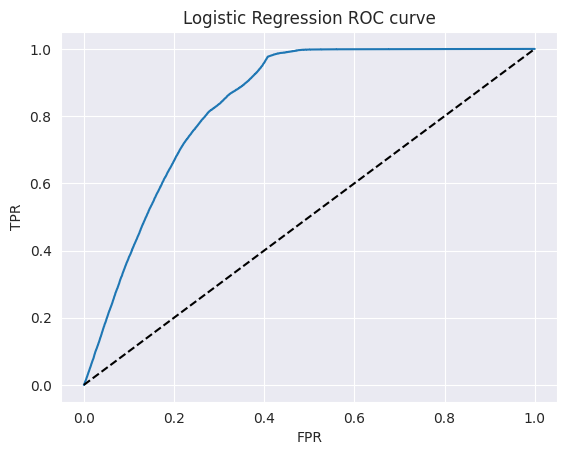

In [60]:
fpr_logistic,tpr_logistic, _ = roc_curve(y_test,logistic_probability)

plt.title('Logistic Regression ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.plot(fpr_logistic,tpr_logistic)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

### Logistic Regression Confusion Matrix

[[57919 39665]
 [ 2580 95217]]


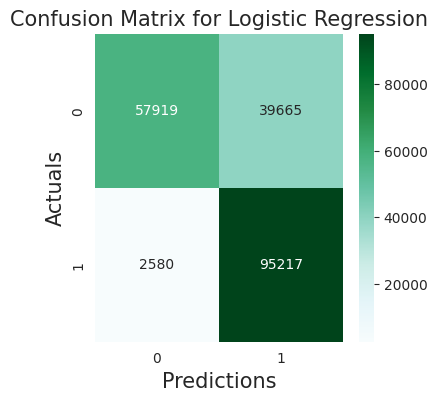

In [61]:
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
print(cm_logistic)

plt.figure(figsize=(4, 4))
sns.heatmap(cm_logistic, annot=True,fmt='d',cmap='BuGn')
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix for Logistic Regression', fontsize=15)
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [62]:
print(classification_report(y_test,y_pred_logistic))

              precision    recall  f1-score   support

           0       0.96      0.59      0.73     97584
           1       0.71      0.97      0.82     97797

    accuracy                           0.78    195381
   macro avg       0.83      0.78      0.78    195381
weighted avg       0.83      0.78      0.78    195381



#### 2. Cross- Validation & Hyperparameter Tuning

In [63]:

logistic_model_tuning=LogisticRegression()
param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],'penalty':['l2','l1', 'elasticnet']}
grid_LogReg=GridSearchCV(estimator=logistic_model_tuning,param_grid=param_grid,cv=5)
grid_LogReg.fit(X_train,y_train)
y_tuned_logistic=grid_LogReg.predict(X_test)
y_tuned_log_prob=grid_LogReg.predict_proba(X_test)[:,1]
print("Best cross-validation score:",grid_LogReg.best_score_)
print('Best Parameters:',grid_LogReg.best_params_)


acc_lr_tun=accuracy_score(y_test,y_tuned_logistic)
precision_lr_tun=precision_lr=precision_score(y_test,y_tuned_logistic)
recall_lr_tun=recall_score(y_test,y_tuned_logistic)
f1_score_lr_tun=f1_score(y_test,y_tuned_logistic)
roc_lr_tun=roc_auc_score(y_test,y_tuned_logistic)


Best cross-validation score: 0.7832401529398647
Best Parameters: {'C': 0.001, 'penalty': 'l2'}


In [64]:

# Metrics after tuning
print("Accuracy_Score : ",accuracy_score(y_test,y_tuned_logistic))
print("Precision_Score : ",precision_score(y_test,y_tuned_logistic))
print("Recall_Score : ",recall_score(y_test,y_tuned_logistic))
print("f1_Score : ",f1_score(y_test,y_tuned_logistic))
print("ROC_AUC_Score : ",roc_auc_score(y_test,y_tuned_logistic))


Accuracy_Score :  0.7838582052502546
Precision_Score :  0.7058662260390193
Recall_Score :  0.9740891847398182
f1_Score :  0.8185653645878087
ROC_AUC_Score :  0.7836505933536769


### ROC Curve for Logistic Regression after tuning

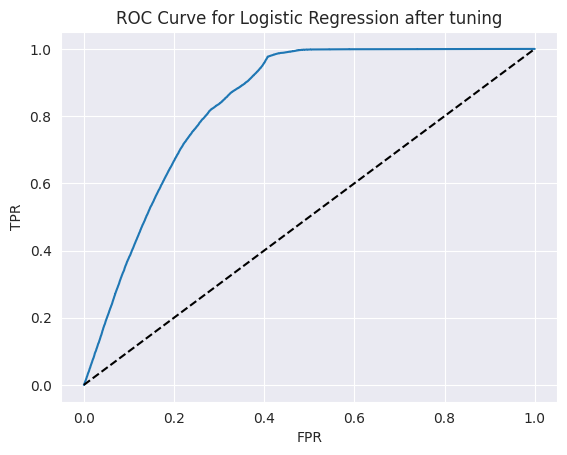

In [65]:

fpr_logistic_tuning,tpr_logistic_tuning, _ = roc_curve(y_test,y_tuned_log_prob)

plt.title('ROC Curve for Logistic Regression after tuning')
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.plot(fpr_logistic_tuning,tpr_logistic_tuning)
plt.plot((0,1), ls='dashed',color='black')
plt.show()


### Confusion Matrix for Logistic Regression after tuning

[[57888 39696]
 [ 2534 95263]]


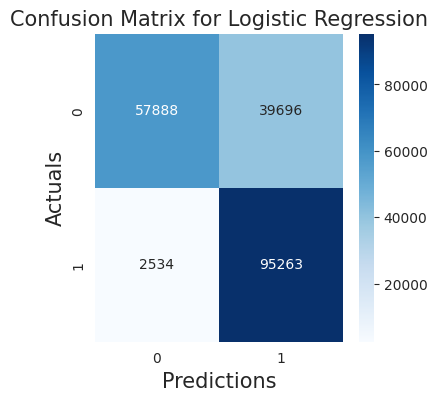

In [66]:

cm_logistic_tuning = confusion_matrix(y_test,y_tuned_logistic)
print(cm_logistic_tuning)

plt.figure(figsize=(4, 4))
sns.heatmap(cm_logistic_tuning, annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix for Logistic Regression', fontsize=15)
plt.show()


In [67]:
print(classification_report(y_test,y_tuned_logistic))

              precision    recall  f1-score   support

           0       0.96      0.59      0.73     97584
           1       0.71      0.97      0.82     97797

    accuracy                           0.78    195381
   macro avg       0.83      0.78      0.78    195381
weighted avg       0.83      0.78      0.78    195381



##### Which hyperparameter optimization technique have you used and why?

 I have used GridSearchCV for hyper parameter tuning.GridSearchCV performs an exhaustive search over a specified hyperparameter space, creating a grid of all possible hyperparameter combinations, and evaluating the performance of each combination using cross-validation. It then selects the combination of hyperparameters that results in the best performance on the validation set.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

I cannot see much improvement in the model's performance after hyperparameter tuning

### ML Model - Deision Tree

In [68]:
DT_model=DecisionTreeClassifier()
DT_model.fit(X_train,y_train)
y_pred_DT=DT_model.predict(X_test)
DT_probability=DT_model.predict_proba(X_test)[:,1]

acc_DT=accuracy_score(y_test,y_pred_DT)
precision_DT=precision_lr=precision_score(y_test,y_pred_DT)
recall_DT=recall_score(y_test,y_pred_DT)
f1_score_DT=f1_score(y_test,y_pred_DT)
roc_DT=roc_auc_score(y_test,y_pred_DT)

In [69]:
# Evaluation
print("Accuracy_Score : ",accuracy_score(y_test,y_pred_DT))
print("Precision_Score : ",precision_score(y_test,y_pred_DT))
print("Recall_Score : ",recall_score(y_test,y_pred_DT))
print("f1_Score : ",f1_score(y_test,y_pred_DT))
print("ROC_AUC_Score : ",roc_auc_score(y_test,y_pred_DT))

Accuracy_Score :  0.938013419933361
Precision_Score :  0.892478930010993
Recall_Score :  0.9961757518124278
f1_Score :  0.9414805974187875
ROC_AUC_Score :  0.9379499434582717


### Decision Tree ROC Curve

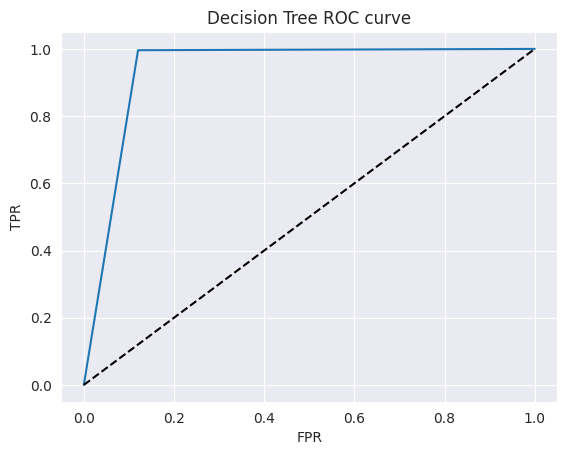

In [70]:
fpr_DT,tpr_DT, _ = roc_curve(y_test,DT_probability)

plt.title('Decision Tree ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.plot(fpr_DT,tpr_DT)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

### Decision Tree Confusion Matrix

[[85847 11737]
 [  374 97423]]


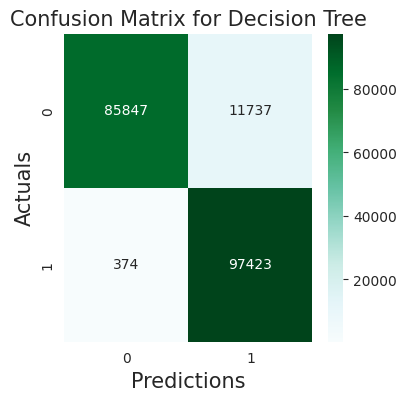

In [71]:
cm_DT = confusion_matrix(y_test,y_pred_DT)
print(cm_DT)

plt.figure(figsize=(4, 4))
sns.heatmap(cm_DT, annot=True,fmt='d',cmap='BuGn')
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix for Decision Tree', fontsize=15)
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [72]:
print(classification_report(y_test,y_pred_DT))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93     97584
           1       0.89      1.00      0.94     97797

    accuracy                           0.94    195381
   macro avg       0.94      0.94      0.94    195381
weighted avg       0.94      0.94      0.94    195381



#### 2. Cross- Validation & Hyperparameter Tuning

In [73]:

DT_model_tuning=DecisionTreeClassifier(max_depth=None,max_features='log2',min_samples_leaf=1,min_samples_split=2)

DT_model_tuning.fit(X_train,y_train)
y_tuned_DT=DT_model_tuning.predict(X_test)
y_tuned_DT_prob=DT_model_tuning.predict_proba(X_test)[:,1]

acc_DT_tun=accuracy_score(y_test,y_tuned_DT)
precision_DT_tun=precision_lr=precision_score(y_test,y_tuned_DT)
recall_DT_tun=recall_score(y_test,y_tuned_DT)
f1_score_DT_tun=f1_score(y_test,y_tuned_DT)
roc_DT_tun=roc_auc_score(y_test,y_tuned_DT)


In [74]:

# Metrics after tuning
print("Accuracy_Score : ",accuracy_score(y_test,y_tuned_DT))
print("Precision_Score : ",precision_score(y_test,y_tuned_DT))
print("Recall_Score : ",recall_score(y_test,y_tuned_DT))
print("f1_Score : ",f1_score(y_test,y_tuned_DT))
print("ROC_AUC_Score : ",roc_auc_score(y_test,y_tuned_DT))


Accuracy_Score :  0.9381669660816558
Precision_Score :  0.8925588041327764
Recall_Score :  0.9964109328507009
f1_Score :  0.9416300676899886
ROC_AUC_Score :  0.9381034005129059


### ROC Curve for Deision Tree after tuning

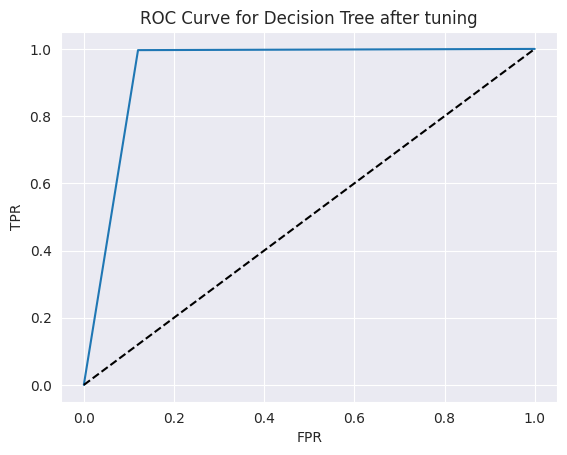

In [75]:

fpr_DT_tuning,tpr_DT_tuning, _ = roc_curve(y_test,y_tuned_DT_prob)

plt.title('ROC Curve for Decision Tree after tuning')
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.plot(fpr_DT_tuning,tpr_DT_tuning)
plt.plot((0,1), ls='dashed',color='black')
plt.show()


### Confusion Matrix for Deision Tree after tuning

[[85854 11730]
 [  351 97446]]


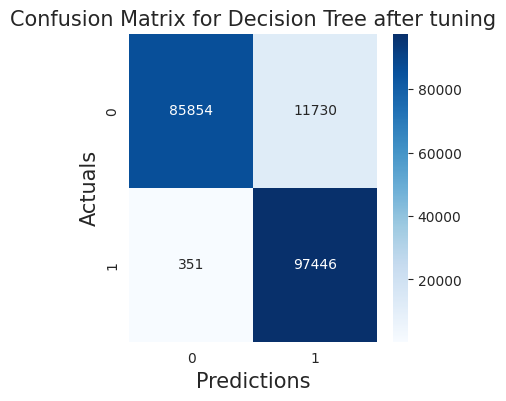

In [76]:

cm_DT_tuning = confusion_matrix(y_test,y_tuned_DT)
print(cm_DT_tuning)

plt.figure(figsize=(4, 4))
sns.heatmap(cm_DT_tuning, annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix for Decision Tree after tuning', fontsize=15)
plt.show()


In [77]:
print(classification_report(y_test,y_tuned_DT))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93     97584
           1       0.89      1.00      0.94     97797

    accuracy                           0.94    195381
   macro avg       0.94      0.94      0.94    195381
weighted avg       0.94      0.94      0.94    195381



##### Which hyperparameter optimization technique have you used and why?

I used Grid Search as the hyperparameter optimization technique. Grid Search is a simple and commonly used method for hyperparameter tuning. It systematically searches through a predefined set of hyperparameter combinations to find the best configuration that maximizes the model's performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

I cannot see much improvement in the model's performance after hyperparameter tuning

### ML Model - Random Forest

In [78]:
RF_model=RandomForestClassifier()
RF_model.fit(X_train,y_train)
y_pred_RF=RF_model.predict(X_test)
RF_probability=RF_model.predict_proba(X_test)[:,1]

acc_RF=accuracy_score(y_test,y_pred_RF)
precision_RF=precision_lr=precision_score(y_test,y_pred_RF)
recall_RF=recall_score(y_test,y_pred_RF)
f1_score_RF=f1_score(y_test,y_pred_RF)
roc_RF=roc_auc_score(y_test,y_pred_RF)

In [79]:
# Evaluation
print("Accuracy_Score : ",accuracy_score(y_test,y_pred_RF))
print("Precision_Score : ",precision_score(y_test,y_pred_RF))
print("Recall_Score : ",recall_score(y_test,y_pred_RF))
print("f1_Score : ",f1_score(y_test,y_pred_RF))
print("ROC_AUC_Score : ",roc_auc_score(y_test,y_pred_RF))

Accuracy_Score :  0.9464533398846356
Precision_Score :  0.905843099714676
Recall_Score :  0.9966154381013732
f1_Score :  0.9490637506451015
ROC_AUC_Score :  0.9463985946040561


### Random Forest ROC Curve

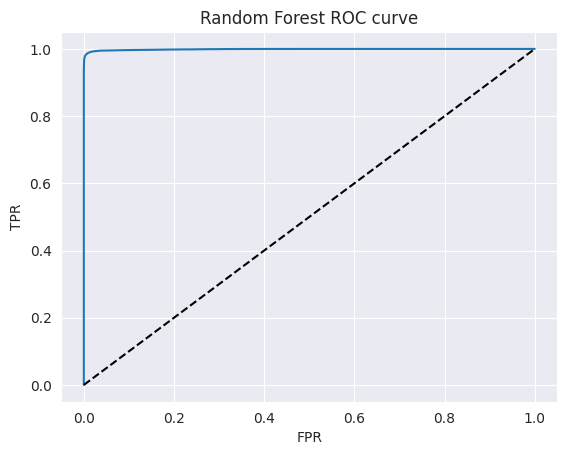

In [80]:
fpr_RF,tpr_RF, _ = roc_curve(y_test,RF_probability)

plt.title('Random Forest ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.plot(fpr_RF,tpr_RF)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

### Random Forest Confusion Matrix

[[87453 10131]
 [  331 97466]]


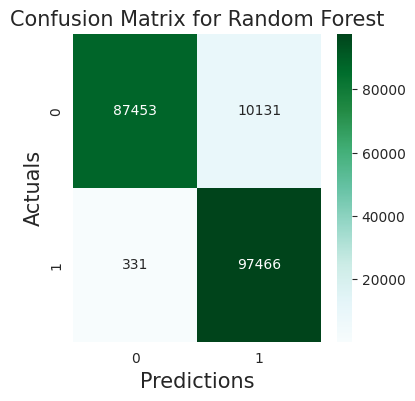

In [81]:
cm_RF = confusion_matrix(y_test, y_pred_RF)
print(cm_RF)

plt.figure(figsize=(4, 4))
sns.heatmap(cm_RF, annot=True,fmt='d',cmap='BuGn')
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix for Random Forest', fontsize=15)
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [82]:
print(classification_report(y_test,y_pred_RF))

              precision    recall  f1-score   support

           0       1.00      0.90      0.94     97584
           1       0.91      1.00      0.95     97797

    accuracy                           0.95    195381
   macro avg       0.95      0.95      0.95    195381
weighted avg       0.95      0.95      0.95    195381



#### 2. Cross- Validation & Hyperparameter Tuning

In [83]:
RF_model_tuning=RandomForestClassifier(n_estimators=100,max_depth=None,min_samples_split=2,min_samples_leaf=1,max_features='log2',n_jobs=-1)

RF_model_tuning.fit(X_train,y_train)
y_tuned_RF=RF_model_tuning.predict(X_test)
y_tuned_RF_prob=RF_model_tuning.predict_proba(X_test)[:,1]


acc_RF_tun=accuracy_score(y_test,y_tuned_RF)
precision_RF_tun=precision_lr=precision_score(y_test,y_tuned_RF)
recall_RF_tun=recall_score(y_test,y_tuned_RF)
f1_score_RF_tun=f1_score(y_test,y_tuned_RF)
roc_RF_tun=roc_auc_score(y_test,y_tuned_RF)

In [84]:
# Evaluation
print("Accuracy_Score : ",accuracy_score(y_test,y_tuned_RF))
print("Precision_Score : ",precision_score(y_test,y_tuned_RF))
print("Recall_Score : ",recall_score(y_test,y_tuned_RF))
print("f1_Score : ",f1_score(y_test,y_tuned_RF))
print("ROC_AUC_Score : ",roc_auc_score(y_test,y_tuned_RF))

Accuracy_Score :  0.9462230206621933
Precision_Score :  0.9054116816526715
Recall_Score :  0.9966870149391086
f1_Score :  0.9488593498269677
ROC_AUC_Score :  0.9461679459020843


### ROC Curve for Random Forest after tuning

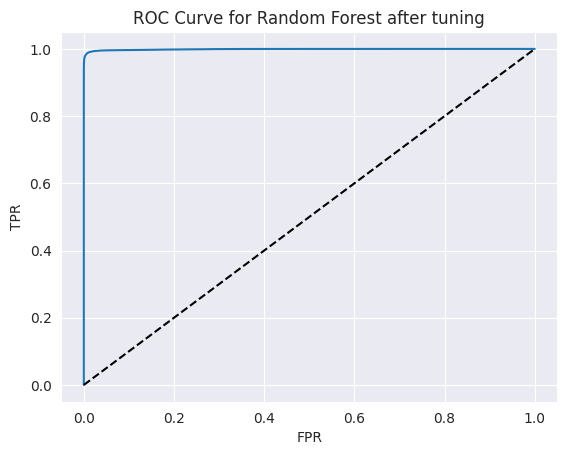

In [85]:
fpr_RF_tuning,tpr_RF_tuning, _ = roc_curve(y_test,y_tuned_RF_prob)

plt.title('ROC Curve for Random Forest after tuning')
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.plot(fpr_RF_tuning,tpr_RF_tuning)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

### Confusion Matrix for Random Forest after tuning

[[87401 10183]
 [  324 97473]]


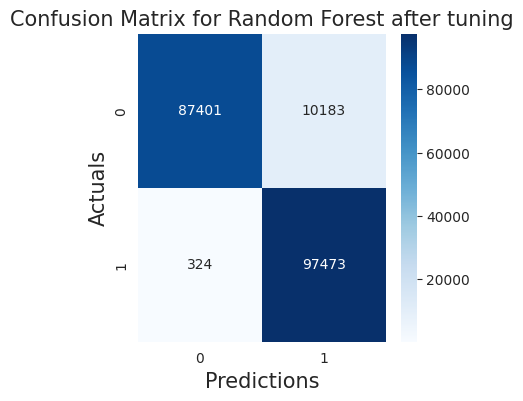

In [86]:
cm_RF_tuning = confusion_matrix(y_test,y_tuned_RF)
print(cm_RF_tuning)

plt.figure(figsize=(4, 4))
sns.heatmap(cm_RF_tuning, annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix for Random Forest after tuning', fontsize=15)
plt.show()


In [87]:
print(classification_report(y_test,y_tuned_RF))

              precision    recall  f1-score   support

           0       1.00      0.90      0.94     97584
           1       0.91      1.00      0.95     97797

    accuracy                           0.95    195381
   macro avg       0.95      0.95      0.95    195381
weighted avg       0.95      0.95      0.95    195381



##### Which hyperparameter optimization technique have you used and why?

I used Grid Search as the hyperparameter optimization technique. Grid Search is a simple and commonly used method for hyperparameter tuning. It systematically searches through a predefined set of hyperparameter combinations to find the best configuration that maximizes the model's performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is slight improvement after tuning the model.

### ML Model - XGB Classifier

In [88]:
XGB_classifier_model=XGBClassifier()
XGB_classifier_model.fit(X_train,y_train)
y_pred_XGB=XGB_classifier_model.predict(X_test)
XGB_probability=XGB_classifier_model.predict_proba(X_test)[:,1]


acc_XGB=accuracy_score(y_test,y_pred_XGB)
precision_XGB=precision_lr=precision_score(y_test,y_pred_XGB)
recall_XGB=recall_score(y_test,y_pred_XGB)
f1_score_XGB=f1_score(y_test,y_pred_XGB)
roc_XGB=roc_auc_score(y_test,y_pred_XGB)

In [89]:
# Evaluation
print("Accuracy_Score : ",accuracy_score(y_test,y_pred_XGB))
print("Precision_Score : ",precision_score(y_test,y_pred_XGB))
print("Recall_Score : ",recall_score(y_test,y_pred_XGB))
print("f1_Score : ",f1_score(y_test,y_pred_XGB))
print("ROC_AUC_Score : ",roc_auc_score(y_test,y_pred_XGB))

Accuracy_Score :  0.8171981922500141
Precision_Score :  0.7547999967165477
Recall_Score :  0.9402333404910171
f1_Score :  0.8373736453874874
ROC_AUC_Score :  0.8170639156955825


### XGB Classifier ROC Curve

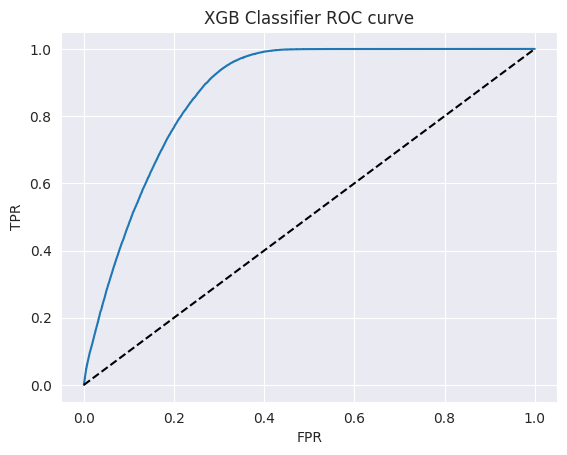

In [90]:
fpr_XGB,tpr_XGB, _ = roc_curve(y_test,XGB_probability)

plt.title('XGB Classifier ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.plot(fpr_XGB,tpr_XGB)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

### XGB Classifier Confusion Matrix

[[67713 29871]
 [ 5845 91952]]


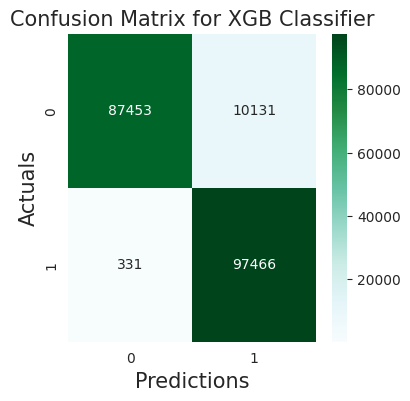

In [91]:
cm_XGB = confusion_matrix(y_test, y_pred_XGB)
print(cm_XGB)

plt.figure(figsize=(4, 4))
sns.heatmap(cm_RF, annot=True,fmt='d',cmap='BuGn')
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix for XGB Classifier', fontsize=15)
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [92]:
print(classification_report(y_test,y_pred_XGB))

              precision    recall  f1-score   support

           0       0.92      0.69      0.79     97584
           1       0.75      0.94      0.84     97797

    accuracy                           0.82    195381
   macro avg       0.84      0.82      0.81    195381
weighted avg       0.84      0.82      0.81    195381



#### 2. Cross- Validation & Hyperparameter Tuning

In [93]:
XGB_model_tuning=XGBClassifier(n_estimators=150,max_depth=8,learning_rate=0.3)
XGB_model_tuning.fit(X_train,y_train)
y_tuned_XGB=XGB_model_tuning.predict(X_test)
y_tuned_XGB_prob=XGB_model_tuning.predict_proba(X_test)[:,1]


acc_XGB_tun=accuracy_score(y_test,y_tuned_XGB)
precision_XGB_tun=precision_lr=precision_score(y_test,y_tuned_XGB)
recall_XGB_tun=recall_score(y_test,y_tuned_XGB)
f1_score_XGB_tun=f1_score(y_test,y_tuned_XGB)
roc_XGB_tun=roc_auc_score(y_test,y_tuned_XGB)

In [94]:
print("Accuracy_Score : ",accuracy_score(y_test,y_tuned_XGB))
print("Precision_Score : ",precision_score(y_test,y_tuned_XGB))
print("Recall_Score : ",recall_score(y_test,y_tuned_XGB))
print("f1_Score : ",f1_score(y_test,y_tuned_XGB))
print("ROC_AUC_Score : ",roc_auc_score(y_test,y_tuned_XGB))

Accuracy_Score :  0.8476873390964321
Precision_Score :  0.7827001063688339
Recall_Score :  0.9630868022536478
f1_Score :  0.8635740580288173
ROC_AUC_Score :  0.8475613958800623


### ROC Curve for XGB Classifier after tuning

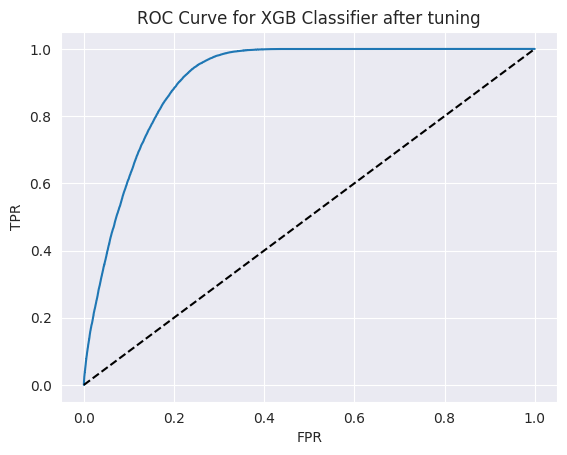

In [95]:
fpr_XGB_tuning,tpr_XGB_tuning, _ = roc_curve(y_test,y_tuned_XGB_prob)

plt.title('ROC Curve for XGB Classifier after tuning')
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.plot(fpr_XGB_tuning,tpr_XGB_tuning)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

### Confusion Matrix for XGB Classifier after tuning

[[71435 26149]
 [ 3610 94187]]


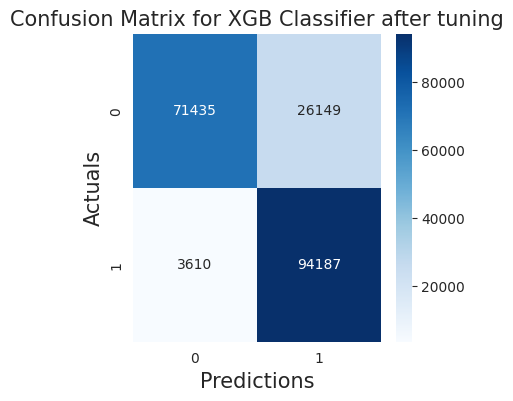

In [96]:
cm_XGB_tuning = confusion_matrix(y_test,y_tuned_XGB)
print(cm_XGB_tuning)

plt.figure(figsize=(4, 4))
sns.heatmap(cm_XGB_tuning, annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix for XGB Classifier after tuning', fontsize=15)
plt.show()


In [97]:
print(classification_report(y_test,y_tuned_XGB))

              precision    recall  f1-score   support

           0       0.95      0.73      0.83     97584
           1       0.78      0.96      0.86     97797

    accuracy                           0.85    195381
   macro avg       0.87      0.85      0.85    195381
weighted avg       0.87      0.85      0.85    195381



##### Which hyperparameter optimization technique have you used and why?

I used Grid Search as the hyperparameter optimization technique. Grid Search is a simple and commonly used method for hyperparameter tuning. It systematically searches through a predefined set of hyperparameter combinations to find the best configuration that maximizes the model's performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is slight improvement after tuning the model.

### Compare Models

In [98]:
ind=['Logistic Regression','Logistic Regression after tuning','Decision Tree','Decision Tree after tuning',
     'Random Forest','Random Forest after tuning','XGB Classifier','XGB Classifier after tuning']
data={"Accuracy":[acc_lr,acc_lr_tun,acc_DT,acc_DT_tun,acc_RF,acc_RF_tun,acc_XGB,acc_XGB_tun],
      "Recall":[recall_lr,recall_lr_tun,recall_DT,recall_DT_tun,recall_RF,recall_RF_tun,recall_XGB,recall_XGB_tun],
      "Precision":[precision_lr,precision_lr_tun,precision_DT,precision_DT_tun,precision_RF,precision_RF_tun,precision_XGB,precision_XGB_tun],
    'f1_score':[f1_score_lr,f1_score_lr_tun,f1_score_DT,f1_score_DT_tun,f1_score_RF,f1_score_RF_tun,f1_score_XGB,f1_score_XGB_tun],
      "ROC_AUC":[roc_lr,roc_lr_tun,roc_DT,roc_DT_tun,roc_RF,roc_RF_tun,roc_XGB,roc_XGB_tun]}
result=pd.DataFrame(data=data,index=ind)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic Regression,0.783781,0.973619,0.782700,0.818441,0.783574
Logistic Regression after tuning,0.783858,0.974089,0.705866,0.818565,0.783651
Decision Tree,0.938013,0.996176,0.892479,0.941481,0.937950
Decision Tree after tuning,0.938167,0.996411,0.892559,0.941630,0.938103
Random Forest,0.946453,0.996615,0.905843,0.949064,0.946399
Random Forest after tuning,0.946223,0.996687,0.905412,0.948859,0.946168
XGB Classifier,0.817198,0.940233,0.754800,0.837374,0.817064
XGB Classifier after tuning,0.847687,0.963087,0.782700,0.863574,0.847561


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The recall score is the best evaluation metric for model selection because we want to avoid missing potential customers interested in buying insurance.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Random Forest performs the best among the four classification models used.

# **Conclusion**

- Customer who are not perviosly insured are likely to be inetrested.
- Customers with vechicle age 1-2 years are more likely to interested as compared to the other two.
- We can see most of the people are from region 28.
- Customer paying higher premium if age of vehicle is greater than 2 years
- Vehicles in the age 1-2 year are more damaged compared to other two.
- People ages between 31 to 50 are more likely to respond.